# Dimuon spectrum

This ROOTbook produces a plot of the dimuon spectrum starting from a subset of the CMS collision events of Run2010B. The dataset is taken from http://opendata.cern.ch/record/700 , more specifically http://opendata.cern.ch/record/700/files/MuRun2010B.csv.

In [1]:
import ROOT

Welcome to JupyROOT 6.07/03


A little extra: JavaScript visualisation. This command will become a magic very soon.

In [2]:
ROOT.enableJSVis()

## Convert to ROOT format and analyse

First of all we convert the csv file into ROOT format, i.e. filling up a TTree data structure.

In [3]:
dimuons = ROOT.TTree("MuonPairs","MuonPairs")
dimuons.ReadFile("../../data/cms/MuRun2010B.csv")

100000L

Now we create an histogram to hold the invariant mass values. In order to loop on the TTree rows, we use the [TTree::Draw](https://root.cern.ch/doc/master/classTTree.html#a73450649dc6e54b5b94516c468523e45) method: this is the most straightforward way in which you can loop on a N-tuple in ROOT.

**Notice that the plot is an interactive JavaScript based visualisation**: you can zoom on the resonances to better inspect the result.

In [4]:
invMass = ROOT.TH1F("invMass","Subset of CMS Run 2010B;{#mu#mu} mass [GeV];Events",512, 2, 110)
invMassFormula = "sqrt((E1 + E2)^2 - ((px1 + px2)^2 + (py1 + py2)^2 + (pz1 + pz2)^2))"
cut = "Q1*Q2==-1"
c = ROOT.TCanvas()
dimuons.Draw(invMassFormula + " >> invMass",cut,"hist")
c.SetLogx()
c.SetLogy()
c.Draw()

That might have been too fast. We now make the analysis above more explicit producing a plot also for the J/Psi particle.

In [5]:
from math import sqrt
invMass = ROOT.TH1F("Spectrum","Subset of CMS Run 2010B;#mu#mu mass [GeV];Events",1024, 2, 110)
jpsiLow = 2.95
jspiHigh = 3.25
jpsi = ROOT.TH1F("jpsi","Subset of CMS Run 2010B: J/#psi window;#mu#mu mass [GeV];Events",128, jpsiLow, jspiHigh)

for e in dimuons: # a loop on the events
    if e.Q1 * e.Q2 != -1:
        continue
    m2 = (e.E1 + e.E2)**2 - ((e.px1 + e.px2)**2 + (e.py1 + e.py2)**2 + (e.pz1 + e.pz2)**2)
    m = sqrt(m2)
    invMass.Fill(m)
    if m < jspiHigh and m > jpsiLow:
        jpsi.Fill(m)

Now time to draw our plot: this time we will inline an image in the notebook. We will plot on the same canvas the full spectrum and the zoom in the J/psi particle.

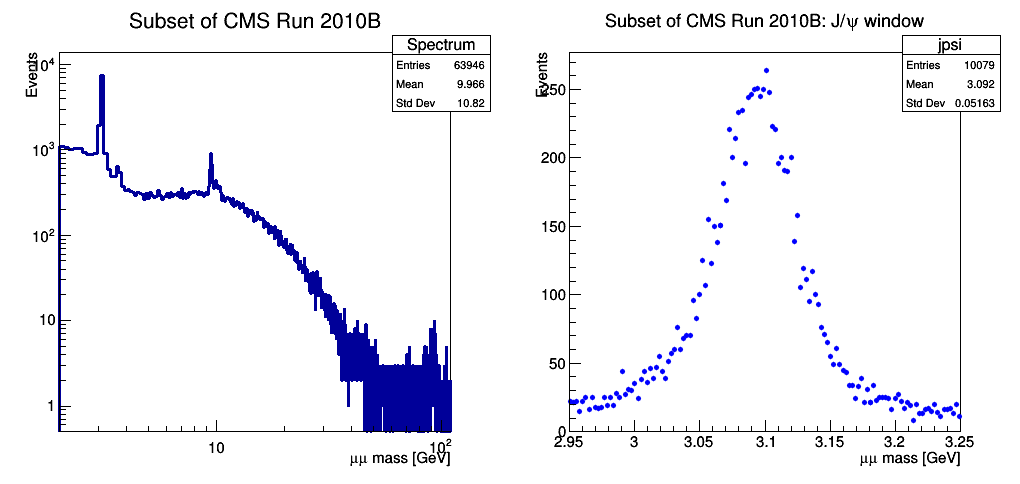

In [6]:
ROOT.disableJSVis()
dualCanvas = ROOT.TCanvas("DualCanvas","DualCanvas",1024,512)
dualCanvas.Divide(2,1)
leftPad = dualCanvas.cd(1)
leftPad.SetLogx()
leftPad.SetLogy()
invMass.Draw("Hist")
dualCanvas.cd(2)
jpsi.Draw("HistP")
dualCanvas.Draw()